# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url);
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country  = city_weather['sys']["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
                          "City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
         print(f"City not found. Skipping... Error: {e}")
         pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okhotsk
Processing Record 2 of Set 1 | ciudad lazaro cardenas
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | yaring
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | pyhajarvi
Processing Record 10 of Set 1 | jiangyou
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | alegrete
Processing Record 13 of Set 1 | carmelo
Processing Record 14 of Set 1 | diamantina
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | devinuwara
City not found. Skipping... Error: 'coord'
Processing Record 17 of Set 1 | hammerfest
Processing Record 18 of Set 1 | canyon
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | kodiak
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okhotsk,59.3833,143.3000,-19.81,76,4,5.24,RU,1736435369
1,ciudad lazaro cardenas,17.9583,-102.2000,24.90,66,100,1.50,MX,1736435115
2,albany,42.6001,-73.9662,-6.97,67,67,4.47,US,1736435359
3,stanley,54.8680,-1.6985,0.29,77,20,5.66,GB,1736435372
4,alofi,-19.0595,-169.9187,23.94,94,75,1.54,NU,1736435373


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okhotsk,59.3833,143.3000,-19.81,76,4,5.24,RU,1736435369
1,ciudad lazaro cardenas,17.9583,-102.2000,24.90,66,100,1.50,MX,1736435115
2,albany,42.6001,-73.9662,-6.97,67,67,4.47,US,1736435359
3,stanley,54.8680,-1.6985,0.29,77,20,5.66,GB,1736435372
4,alofi,-19.0595,-169.9187,23.94,94,75,1.54,NU,1736435373


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

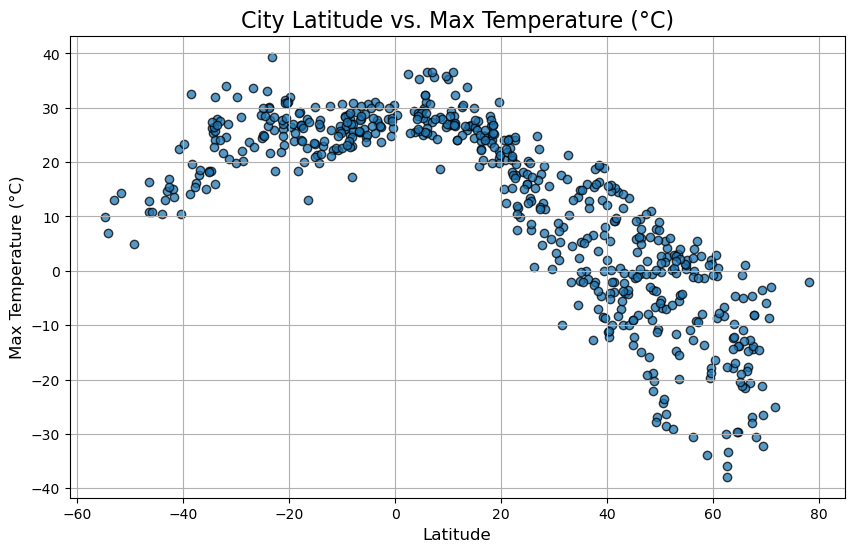

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (°C)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1_Lat_v_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

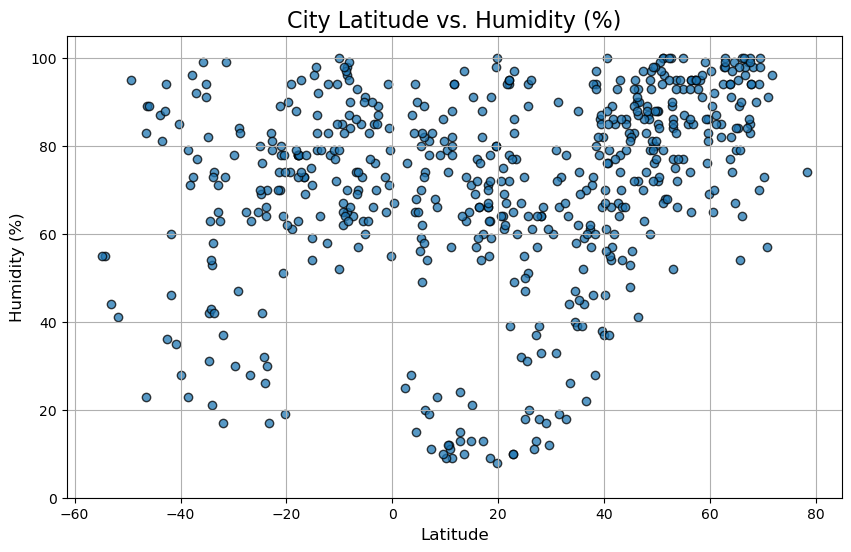

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)
plt.ylim(0, 105)  

# Save the figure
plt.savefig("output_data/Fig2_Lat_v_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

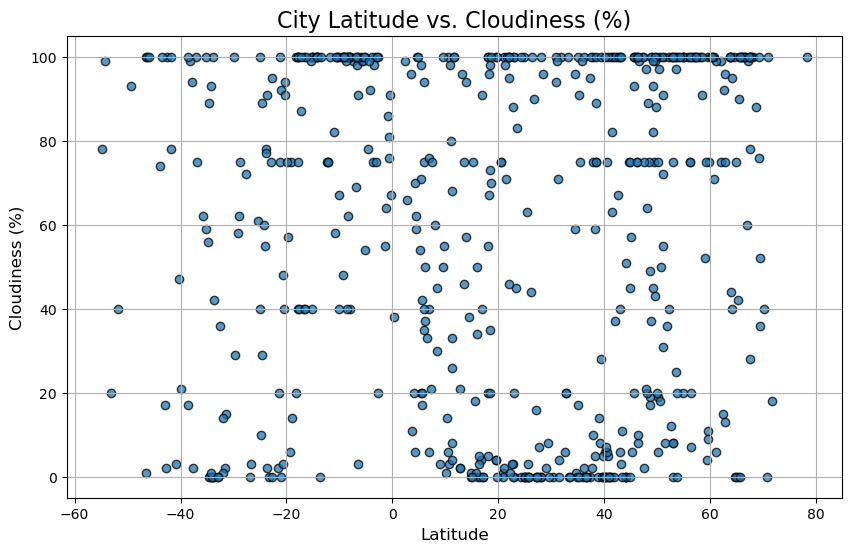

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)
plt.ylim(-5, 105)  

# Save the figure
plt.savefig("output_data/Fig3_Lat_v_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

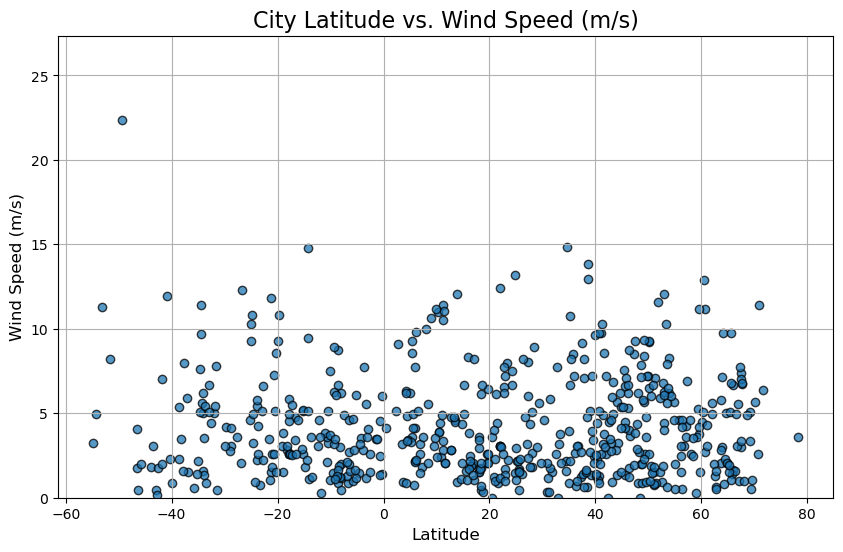

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)
plt.ylim(0, city_data_df["Wind Speed"].max() + 5)  

# Save the figure
plt.savefig("output_data/Fig4_Lat_v_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, ax):
   
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Generate regression line
    regression_line = slope * x_values + intercept
    
    # Plot scatter points and regression line
    ax.scatter(x_values, y_values, edgecolors="black", alpha=0.75, label="Data points")
    ax.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Add labels, title, and legend
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend()
    ax.grid(True)
    
    # Display R-squared value on the plot
    ax.text(0.05, 0.95, f"R² = {r_value**2:.2f}", transform=ax.transAxes, fontsize=12, verticalalignment='top')



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okhotsk,59.3833,143.3000,-19.81,76,4,5.24,RU,1736435369
1,ciudad lazaro cardenas,17.9583,-102.2000,24.90,66,100,1.50,MX,1736435115
2,albany,42.6001,-73.9662,-6.97,67,67,4.47,US,1736435359
3,stanley,54.8680,-1.6985,0.29,77,20,5.66,GB,1736435372
5,vilyuchinsk,52.9306,158.4028,-14.81,77,8,4.44,RU,1736435375


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,alofi,-19.0595,-169.9187,23.94,94,75,1.54,NU,1736435373
7,edinburgh of the seven seas,-37.0676,-12.3116,17.67,92,100,5.93,SH,1736435377
11,alegrete,-29.7831,-55.7919,31.96,30,29,4.16,BR,1736435203
12,carmelo,-33.9892,-58.2856,32.02,21,0,1.58,UY,1736435210
13,diamantina,-18.2494,-43.6003,18.46,88,100,2.82,BR,1736435383


###  Temperature vs. Latitude Linear Regression Plot

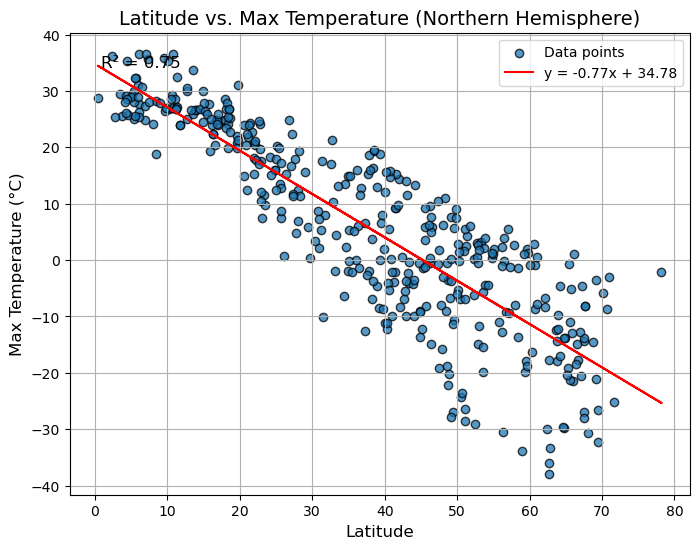

In [15]:
# Linear regression on Northern Hemisphere
fig, ax = plt.subplots(figsize=(8, 6))

# Call the linear regression plotting function
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude vs. Max Temperature (Northern Hemisphere)", 
    "Latitude", 
    "Max Temperature (°C)", 
    ax
)

# Save the figure
plt.savefig("output_data/Fig5_Northern_Temp_Reg.png")

# Show the plot
plt.show()

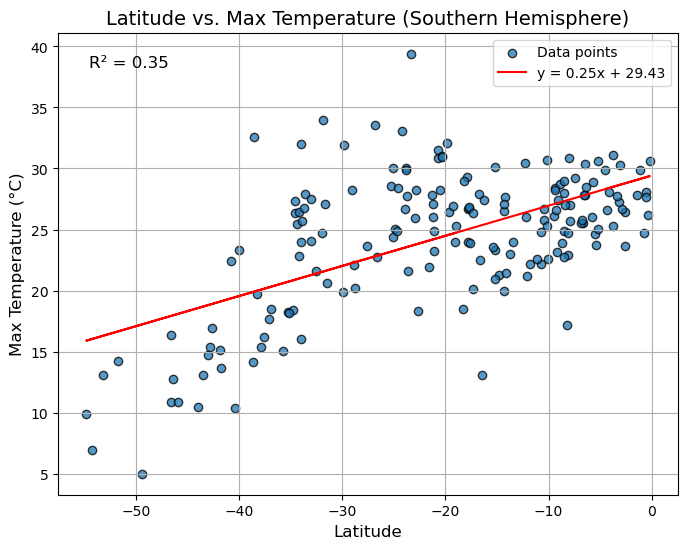

In [16]:
# Linear regression on Southern Hemisphere
fig, ax = plt.subplots(figsize=(8, 6))

# Call the linear regression plotting function
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude vs. Max Temperature (Southern Hemisphere)", 
    "Latitude", 
    "Max Temperature (°C)", 
    ax
)

# Save the figure
plt.savefig("output_data/Fig6_Southern_Temp_Reg.png")

# Show the plot
plt.show()

### Humidity vs. Latitude Linear Regression Plot

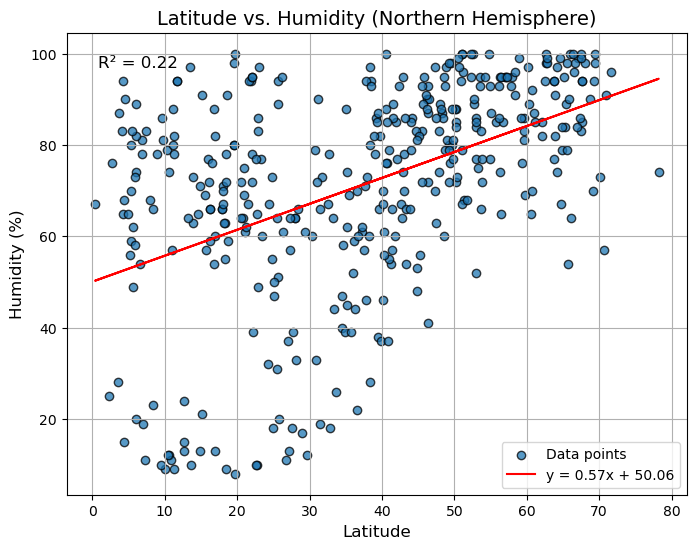

In [17]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize=(8, 6))

# Call the linear regression plotting function for Latitude vs. Humidity
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude vs. Humidity (Northern Hemisphere)", 
    "Latitude", 
    "Humidity (%)", 
    ax
)

# Save the figure
plt.savefig("output_data/Fig7_Northern_Humid_Reg.png")

# Show the plot
plt.show()

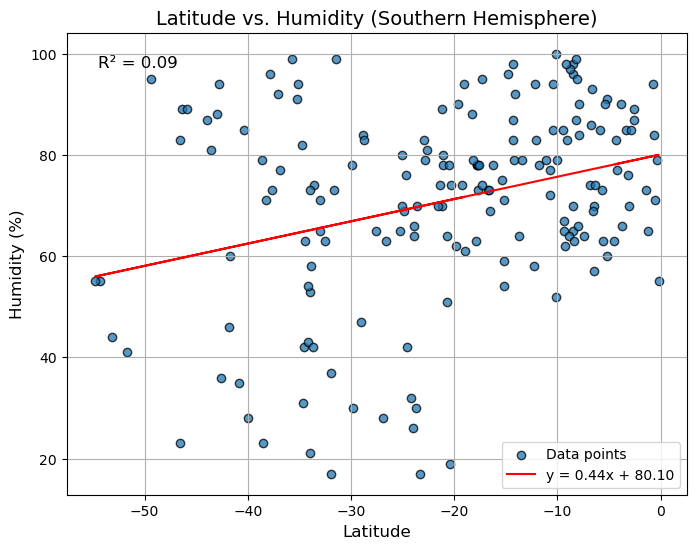

In [18]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize=(8, 6))

# Call the linear regression plotting function for Latitude vs. Humidity
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude vs. Humidity (Southern Hemisphere)", 
    "Latitude", 
    "Humidity (%)", 
    ax
)

# Save the figure
plt.savefig("output_data/Fig8_Southern_Humid_Reg.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Observations: Latitude versus Humidity:
#Northern Hemisphere:
    #The R^2 value indicates 22% of the variability in humidity is related to latitude.  
    #The linear regression equation indicates a positive relationship between latitude and humidity.  Increases in latitude result in an increase in hmidity at a factor of 0.57.  
    #So although there is a positive relationship between latitude and humidity, this relationship is weak and humidity levels are likely influenced by factors other than latitude.

#Southern Hemisphere:
    #The R^2 value indicates 9% of the variability in humidity is related to latitude.  
    #The linear regression equation indicates a modest positive relationship between latitude and humidity.  Increases in latitude result in a modest increase in humidity at a factor of 0.44.  
    #So although there is a modest positive relationship between latitude and humidity, this relationship is very weak and humidity levels are likely influenced by factors other than latitude.

#Overall the Northern Hemisphere shows a higher correlation between latitude and humidity however this is likely caused by factors other than latitude due to the low coefficient of determination.

### Cloudiness vs. Latitude Linear Regression Plot

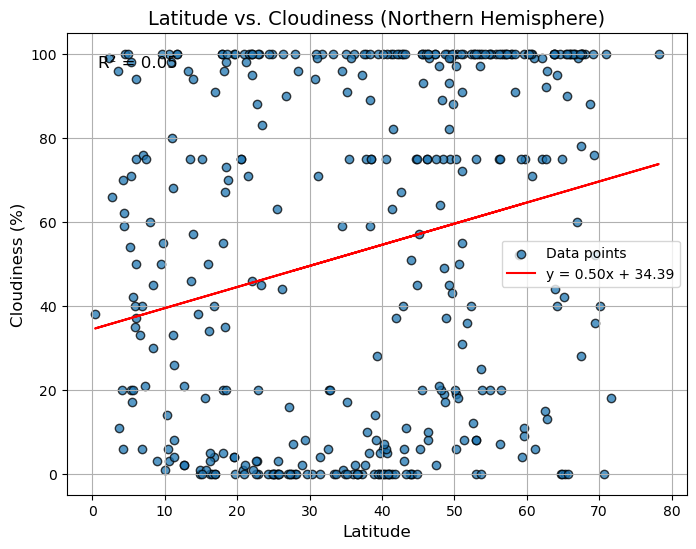

In [19]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize=(8, 6))

# Call the linear regression plotting function for Latitude vs. Cloudiness
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude vs. Cloudiness (Northern Hemisphere)", 
    "Latitude", 
    "Cloudiness (%)", 
    ax
)

# Save the figure
plt.savefig("output_data/Fig9_Northern_Clud_Reg.png")

# Show the plot
plt.show()

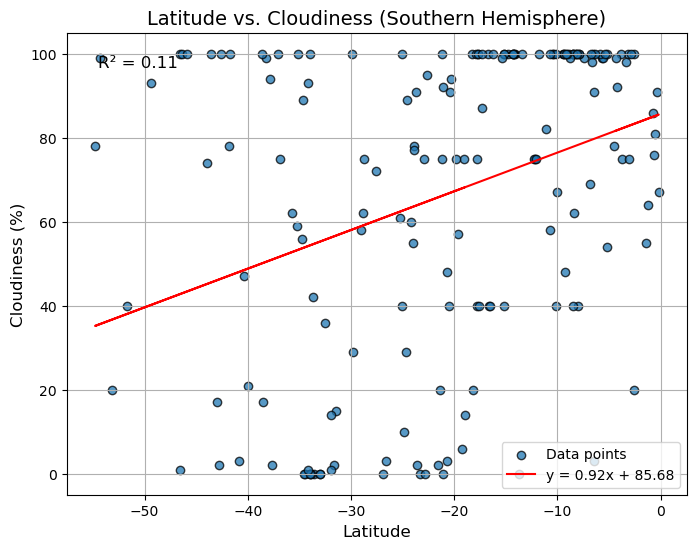

In [20]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize=(8, 6))

# Call the linear regression plotting function for Latitude vs. Cloudiness
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude vs. Cloudiness (Southern Hemisphere)", 
    "Latitude", 
    "Cloudiness (%)", 
    ax
)

# Save the figure
plt.savefig("output_data/Fig10_Southern_Cloud.Reg.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Observations: Latitude versus Cloudiness:
#Northern Hemisphere:
    #The R^2 value indicates 7% of the variability in cloudiness is related to latitude.  
    #The linear regression equation indicates a positive relationship between latitude and cloudiness.  Increases in latitude result in an increase in cloudiness at a factor of 0.50.  
    #So although there is a positive relationship between latitude and cloudiness, this relationship is weak and cloudiness levels are likely influenced by factors other than latitude.

#Southern Hemisphere:
    #The R^2 value indicates 11% of the variability in cloudiness is related to latitude.  
    #The linear regression equation indicates a strong positive relationship between latitude and cloudiness.  Increases in latitude result in an increase in cloudiness at a factor of 0.92.  
    #So although there is a strong positive relationship between latitude and cloudiness, this relationship is very weak and cloudiness levels are likely influenced by factors other than latitude.

#Overall the Southern Hemisphere shows a much higher correlation between latitude and cloudiness however this is likely caused by factors other than latitude due to the low coefficient of determination.

### Wind Speed vs. Latitude Linear Regression Plot

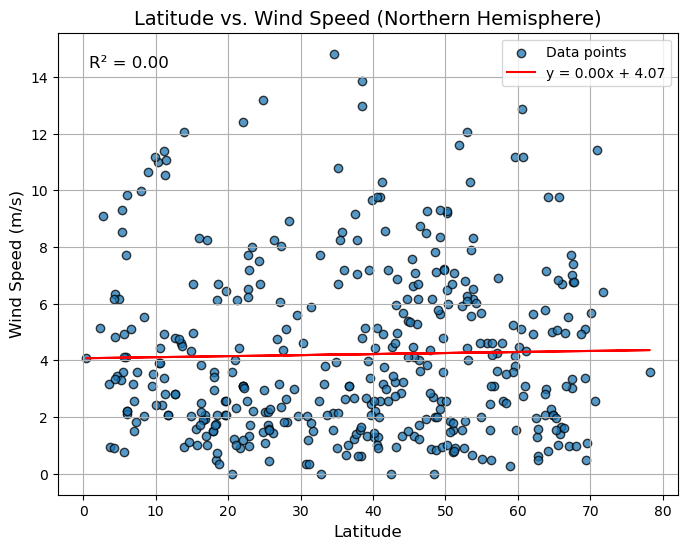

In [21]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize=(8, 6))

# Call the linear regression plotting function for Latitude vs. Wind Speed
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude vs. Wind Speed (Northern Hemisphere)", 
    "Latitude", 
    "Wind Speed (m/s)", 
    ax
)

# Save the figure
plt.savefig("output_data/Fig11_Northern_Wind_Reg.png")

# Show the plot
plt.show()

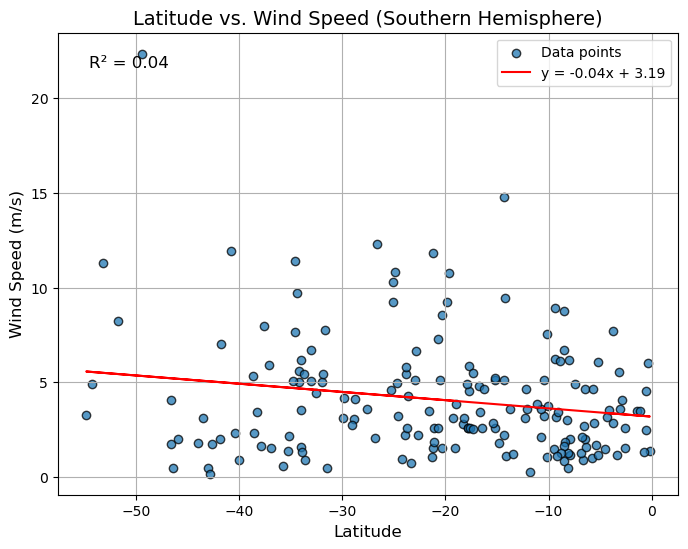

In [22]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize=(8, 6))

# Call the linear regression plotting function for Latitude vs. Wind Speed
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude vs. Wind Speed (Southern Hemisphere)", 
    "Latitude", 
    "Wind Speed (m/s)", 
    ax
)

# Save the figure
plt.savefig("output_data/Fig12_Southern_Wind_Reg.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Observations: Latitude versus Wind Speed:
#Northern Hemisphere:
    #The R^2 value indicates 0% of the variability in wind speed is related to latitude.  
    #The linear regression equation indicates no relationship between latitude and wind speed.  Increases in latitude result in an increase in wind speed at a factor of 0.00.  
    #Latitude and wind speed are not correlated in the Norhtern Hemisphere.

#Southern Hemisphere:
    #The R^2 value indicates 4% of the variability in wind speed is related to latitude.  
    #The linear regression equation indicates a weak negative relationship between latitude and wind speed.  Increases in latitude result in a decrease in wind speed at a factor of -0.4.  
    #There is a very weak negative relationship between latitude and wind speed. This relationship is very weak and wind speed levels are likely influenced by factors other than latitude.

#Latitude is no predictive of wind speed in either the Norhtern of Southern Hemisphere.